<a href="https://colab.research.google.com/github/sbowma15/grabCut_with_mask_generation/blob/main/grabCut_with_mask_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

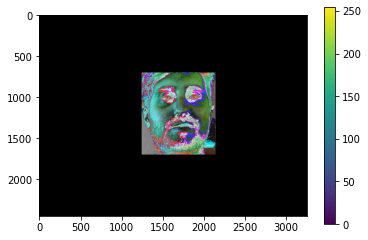

(<matplotlib.image.AxesImage at 0x7fced974d9b0>,
 None)

In [ ]:
import numpy as np
import cv2

from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

img = cv.imread('/content/sample_data/Shanepic.jpg')

#Flipping the order of color spectrum values makes the rest of the code
#compatible, otherewise the image tones will be off
img =cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#creates masked image with shape and return type
mask = np.zeros(img.shape[:2],np.uint8)

#array created with double precision floating point value
#Used for foreground and background modeling later
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

#xcoord., ycoord., Height, Width
#used for cutting out rectangular window
rect = (1250,700,900,1000)

#perform grabCut with values passed in, "1" represents the iterations to repeat
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,1,cv.GC_INIT_WITH_RECT)

#Multiplying image by a new mask and using np.newaxis to slice the array
img = img*mask[:,:,np.newaxis]
#img = img*mask[:,:]


#plots the image with a color spectrum bar and increments
plt.imshow(img),plt.colorbar(),plt.show()

#Creating a .png to hold the new mask
#newmask = cv.imread('newmask.png',0)

#wherever it is marked white (sure foreground), change mask=1
#wherever it is marked black (sure background), change mask=0
#mask[newmask==0] = 0
#mask[newmask==255] = 1
#mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
